<a href="https://colab.research.google.com/github/11doris/jazz-maestro/blob/colab_word_embeddings/colab_a_chord_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y gensim

Found existing installation: gensim 4.1.2
Uninstalling gensim-4.1.2:
  Successfully uninstalled gensim-4.1.2


In [2]:
pip install gensim

  Using cached gensim-4.1.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)


In [3]:
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pprint
import pandas as pd
import numpy as np

In [4]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
print(gensim.__version__)

4.1.2


### Download Data

Download the file with the input sequences from Google Drive:

In [6]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y' -O input_seq.txt

--2021-11-01 10:26:36--  https://docs.google.com/uc?export=download&id=1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y
Resolving docs.google.com (docs.google.com)... 142.250.141.102, 142.250.141.113, 142.250.141.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/li4qhmkmf91j1e2p4u0o94vnsfrc097d/1635762375000/14329102864480165501/*/1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y?e=download [following]
--2021-11-01 10:26:36--  https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/li4qhmkmf91j1e2p4u0o94vnsfrc097d/1635762375000/14329102864480165501/*/1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y?e=download
Resolving doc-14-4c-docs.googleusercontent.com (doc-14-4c-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-14-4c-docs.googleusercontent.com (doc-14

Download the file with the meta data from Google Drive:


In [7]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S' -O input_meta.csv

--2021-11-01 10:26:37--  https://docs.google.com/uc?export=download&id=1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S
Resolving docs.google.com (docs.google.com)... 142.250.141.138, 142.250.141.101, 142.250.141.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b7gehubll0f4imcqiisjpfkotsm3o5bo/1635762375000/14329102864480165501/*/1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S?e=download [following]
--2021-11-01 10:26:37--  https://doc-0k-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b7gehubll0f4imcqiisjpfkotsm3o5bo/1635762375000/14329102864480165501/*/1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S?e=download
Resolving doc-0k-4c-docs.googleusercontent.com (doc-0k-4c-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-0k-4c-docs.googleusercontent.com (doc-0k

In [8]:
path_to_file = '/content/input_seq.txt'

with open(path_to_file) as f: 
  lines = f.read().splitlines()

In [9]:
data = [line.split(' ') for line in lines]

In [10]:
print(data)

[['CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'G#7', 'C#M7', 'E7', 'Am7', 'D7', 'Dm7', 'G7', 'CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'CM7', 'Gm7', 'C7', 'Bm7', 'E7', 'AM7', 'C7', 'FM7', 'Bbm7', 'Eb7', 'G#M7', 'Dm7', 'G7', 'CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'CM7'], ['Am7', 'Am7', 'Cm7', 'Cm7', 'EbM7', 'EbM7', 'Em7b5', 'A7', 'Dm7', 'Dm7', 'Bm7b5', 'Bm7b5', 'Bbm7', 'Bbm7', 'Fm7', 'Fm7', 'E7', 'E7', 'Fm7', 'Fm7', 'C#M7', 'C#M7', 'Fm7', 'Fm7', 'C#M7', 'C#M7'], ['Am7', 'C#M7', 'Bm7b5', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7', 'Cm7', 'F7', 'BbM7', 'G#m7', 'C#7', 'F#m7b5', 'B7', 'EM7', 'EM7', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7', 'Cm7', 'F7', 'BbM7', 'G#m7', 'C#7', 'F#m7b5', 'B7', 'Em7', 'Em7'], ['C', 'Am7', 'Dm7', 'G7', 'C', 'Am7', 'Dm7', 'G7', 'C', 'Am7', 'Dm7', 'G7', 'C', 'G7', 'C', 'C', 'Am7', 'Dm7', 'G7', 'C', 'Am7', 'Dm7', 'G7', 'C', '

### Meta data

In [11]:
meta = pd.read_csv('input_meta.csv', sep='\t')
meta

,id,file_name,title,composer,year,year_truncated,tonality,tune_key,tune_mode,structure,num_bars,time_signature,cycle_fifths_order,style,musicbrainz_id,wikidata_id,wikidata_allmusic,wiki_link,wikidata_description,lyricist
0,0,dataset/jazz1350/26-2.xml,26-2,John Coltrane,1960.0,1960.0,F major,F,major,AABA,32.0,4/4,-1.0,Medium Up Swing,eb51f0dd-c9a6-3849-b135-9cfaa7a90396,NaN,NaN,NaN,NaN,NaN
1,1,dataset/jazz1350/500 Miles High.xml,500 Miles High,Chick Corea,1978.0,1978.0,E minor,E,minor,NaN,26.0,4/4,1.0,Bossa Nova,1e03810a-6632-35ee-959b-dfd244be19b5,NaN,NaN,NaN,NaN,Neville Potter
2,2,dataset/jazz1350/502 Blues.xml,502 Blues,Jimmy Rowles,1962.0,1962.0,A minor,A,minor,NaN,32.0,3/4,0.0,Waltz,cff33fd3-7be2-3559-b06a-1d5cee201939,NaN,NaN,NaN,NaN,NaN
3,3,dataset/jazz1350/52nd Street Theme.xml,52nd Street Theme,Thelonious Monk,1944.0,1944.0,C major,C,major,AABA,32.0,4/4,0.0,Up Tempo Swing,aaa19faf-298a-3e89-9599-6a30866cd7fd,NaN,NaN,NaN,NaN,NaN
4,4,dataset/jazz1350/9.20 Special.xml,9.20 Special,Earle Warren,1941.0,1941.0,C major,C,major,AABA,32.0,4/4,0.0,Medium Swing,67755649-b89e-409c-ad6b-488f4cd455a5,Q16824165,NaN,https://en.wikipedia.org/wiki/9:20_Special,1941 song,William Engvick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,2048,dataset/trad/You're Foolin' Someone.xml,You're Foolin' Someone,"Fox, Muir, Lavere, Griffith",1953.0,1953.0,C major,C,major,AABA,32.0,4/4,0.0,Medium Swing,NaN,NaN,NaN,NaN,NaN,NaN
2569,2049,dataset/trad/You're Lucky To Me.xml,You're Lucky To Me,Unknown Composer,NaN,NaN,F major,F,major,AA,32.0,4/4,-1.0,Medium Swing,NaN,NaN,NaN,NaN,NaN,NaN
2570,2050,dataset/trad/You're Nobody Till Somebody Loves...,You're Nobody Till Somebody Loves You,Unknown Composer,1944.0,1944.0,F major,F,major,A,32.0,4/4,-1.0,Medium Swing,NaN,NaN,NaN,NaN,NaN,NaN
2571,2051,dataset/trad/Your Feet's Too Big.xml,Your Feet's Too Big,Fred Fisher,1935.0,1935.0,C major,C,major,NaN,35.0,4/4,0.0,Medium Swing,7a3f0ada-a4f9-4500-9642-583b65f08ef5,Q633450,NaN,https://en.wikipedia.org/wiki/Your_Feet%27s_To...,original song written and composed by Fred Fis...,Ada Benson


In [12]:
titles = meta.loc[:, ['id', 'title']].drop_duplicates()
titles.set_index('id', inplace=True)
titles

,title
id,
0,26-2
1,500 Miles High
2,502 Blues
3,52nd Street Theme
4,9.20 Special
...,...
2048,You're Foolin' Someone
2049,You're Lucky To Me
2050,You're Nobody Till Somebody Loves You


## Train Model

In [13]:
# train model
model = gensim.models.Word2Vec(data, 
                               min_count=1,
                               sample=0.1,
                               sg=1,
                               window=3,
                               negative=5,
                               epochs=50,
                               alpha=0.025,
                               )

2021-11-01 10:26:38,480 : INFO : collecting all words and their counts
2021-11-01 10:26:38,482 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-11-01 10:26:38,503 : INFO : collected 159 word types from a corpus of 93630 raw words and 2046 sentences
2021-11-01 10:26:38,504 : INFO : Creating a fresh vocabulary
2021-11-01 10:26:38,506 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 159 unique words (100.0%% of original 159, drops 0)', 'datetime': '2021-11-01T10:26:38.506856', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'prepare_vocab'}
2021-11-01 10:26:38,508 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 93630 word corpus (100.0%% of original 93630, drops 0)', 'datetime': '2021-11-01T10:26:38.508520', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform':

In [14]:
# Finding most similar words
words = model.wv.most_similar("CM7", topn=5)
for word in words:
  print(word)
print()

('Dm7b5', 0.48323020339012146)
('Em7', 0.4709099233150482)
('BmM7', 0.45489296317100525)
('DM13', 0.45199641585350037)
('Dm7', 0.4412088096141815)



In [15]:
# summarize vocabulary
words = model.wv.index_to_key
print(words)

['G7', 'C', 'Dm7', 'CM7', 'A7', 'D7', 'Am7', 'C7', 'E7', 'C6', 'F', 'Em7', 'Am', 'F7', 'FM7', 'Bb7', 'B7', 'Gm7', 'G#7', 'G', 'Bm7b5', 'Fm7', 'Dm', 'Eb7', 'Fm', 'F#m7b5', 'Ebdim7', 'C#7', 'Em7b5', 'Bm7', 'F#m7', 'F#7', 'Cm7', 'Em', 'G#M7', 'F6', 'BbM7', 'Am6', 'Fm6', 'Ebm7', 'Dm7b5', 'EbM7', 'C#M7', 'F#dim7', 'Bbm7', 'EM7', 'C#dim7', 'Ebdim', 'C#m7', 'GM7', 'F#dim', 'Cdim', 'AM7', 'Cm', 'E', 'G13', 'D', 'DM7', 'C#dim', 'Bb', 'G#m7', 'G#', 'BM7', 'Dm6', 'A', 'Cdim7', 'Eb', 'Gm', 'F#M7', 'D13', 'C13', 'Am7b5', 'AmM7', 'G6', 'Gdim', 'B', 'C#', 'Bb13', 'G7(+b5)', 'F13', 'G#dim7', 'G#13', 'C#m7b5', 'Bm', 'E6', 'FmM7', 'E13', 'Fdim7', 'E7(+b5)', 'G#dim', 'Bb6', 'F#7(+b5)', 'Gm7b5', 'Cm6', 'F#', 'A7(+b5)', 'B7(+b5)', 'G#m7b5', 'Gm6', 'A6', 'B13', 'Eb13', 'A13', 'C#m', 'Eb6', 'Edim7', 'D6', 'Bb7(+b5)', 'C#7(+b5)', 'F#13', 'Fdim', 'Adim7', 'DmM7', 'Gdim7', 'Fm7b5', 'CmM7', 'Bbm', 'G#6', 'Ebm6', 'Adim', 'D7(+b5)', 'Em6', 'Bbm6', 'C#13', 'Bdim', 'Bbm7b5', 'C7(+b5)', 'Ebm', 'C#6', 'Bbdim7', 'Ebm7b

In [16]:
print(model.wv['G7'])

[ 0.14831206  0.2735276  -0.03634707 -0.04877661  0.07589927 -0.20638297
  0.14473645  0.39364377 -0.05919367 -0.35272762  0.03753215 -0.08535956
 -0.07433389 -0.27150527  0.03448084  0.10154354  0.36535984 -0.05182436
 -0.04879649 -0.26668555 -0.00545959 -0.10998637  0.15149565 -0.33504274
  0.17341773  0.3051479  -0.38931707 -0.08239085 -0.27172336  0.21690905
 -0.14995778 -0.2604793   0.07985801  0.17650169  0.08490421  0.09548265
  0.06944606  0.22030523  0.08342859  0.01378724 -0.02056597  0.12488807
  0.13651097  0.41924036 -0.14388616 -0.19736926 -0.05152985  0.00114822
 -0.15910064  0.16662954 -0.1546539  -0.26694396  0.03967232  0.01492046
 -0.12208823 -0.22157697  0.01040379  0.05162467 -0.3200004   0.06822419
 -0.0515867  -0.464276    0.14614284  0.19475412 -0.24251212  0.27724954
  0.06748198  0.1513944  -0.23895139  0.17293224  0.03541767  0.34585384
  0.31562307  0.02917968  0.13056307  0.11485502  0.4275854  -0.10944773
 -0.01910346 -0.07942007 -0.12270856 -0.1657556  -0

In [17]:
print(model.wv.similarity('C6', 'CM7'))


0.40156254


Get the word2vec weights:

In [18]:
# input
model.wv.vectors.shape

(159, 100)

In [19]:
model.wv.vectors

array([[ 0.14831206,  0.2735276 , -0.03634707, ...,  0.03184416,
         0.3753464 , -0.23080146],
       [ 0.32978964,  0.09848203, -0.36592588, ..., -0.16178206,
         0.21142781, -0.14988963],
       [-0.02583766,  0.24504775,  0.10810257, ..., -0.04744713,
         0.07962041, -0.22195432],
       ...,
       [-0.01917841,  0.26807046, -0.3514853 , ..., -0.10833152,
         0.1528946 , -0.19779252],
       [-0.1104467 ,  0.0940059 ,  0.05880671, ...,  0.12579066,
        -0.01918013, -0.4497728 ],
       [ 0.06230186,  0.15931824,  0.16654228, ...,  0.13594237,
         0.06876001, -0.24678332]], dtype=float32)

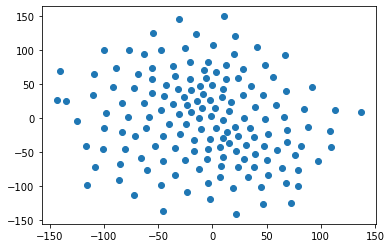

In [20]:
X = model.wv[model.wv.key_to_index]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [21]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

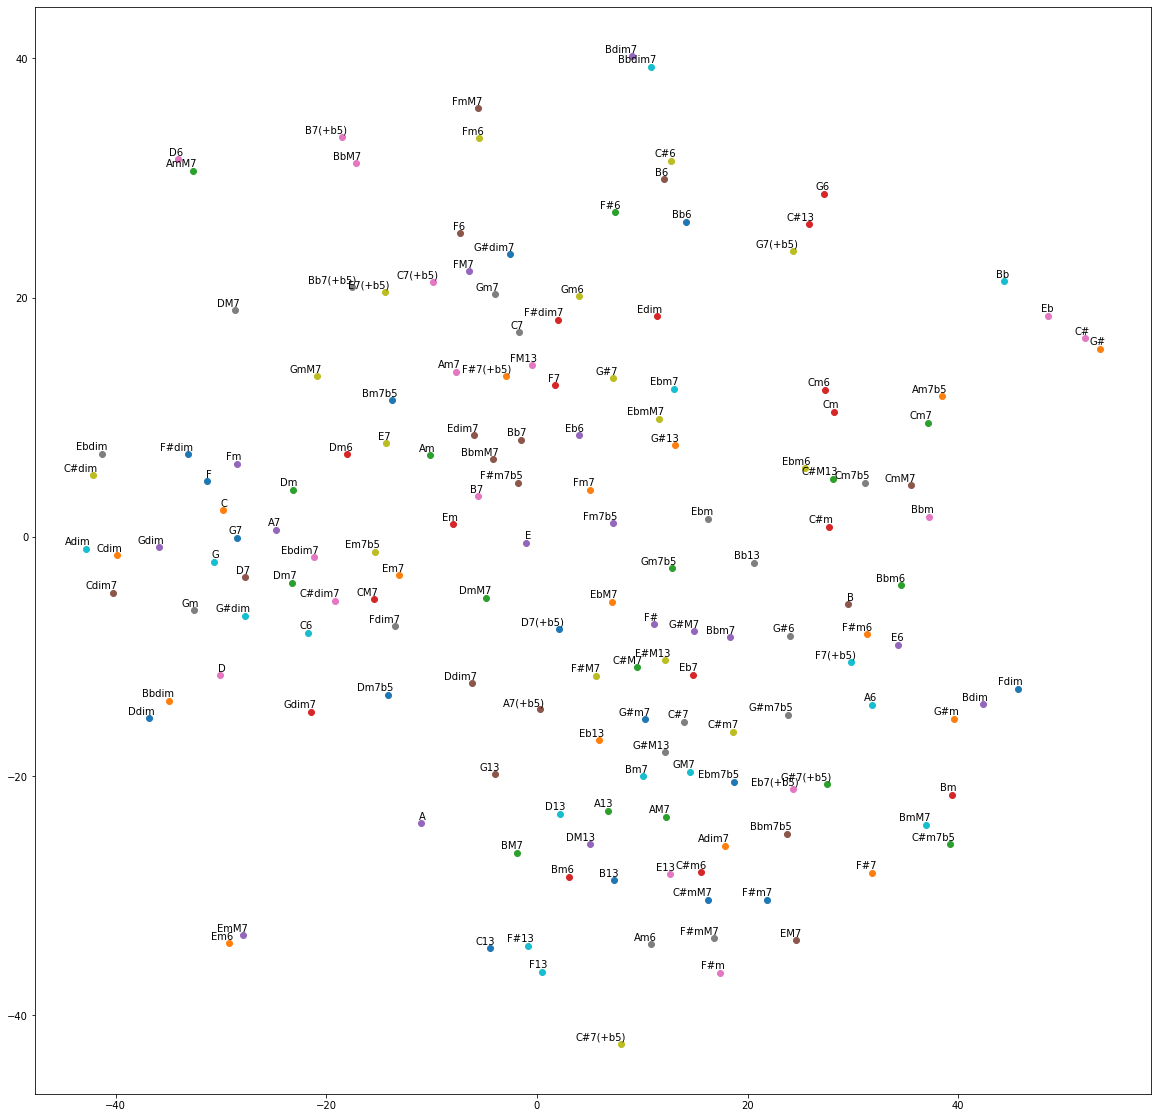

In [22]:
tsne_plot(model)

## Doc2Vec Example Code from gensim

### Core Concepts 

In [23]:
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [24]:
path_to_file = '/content/input_seq.txt'

#with open(path_to_file) as f: 
#  text_corpus = f.read().splitlines()

In [25]:
import pprint

# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
#texts = [[word for word in document.split()]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus[0:5])

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time']]


Before proceeding, we want to associate each word in the corpus with a unique integer ID. We can do this using the `gensim.corpora.Dictionary` class. This dictionary defines the vocabulary of all words that our processing knows about.

In [26]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

2021-11-01 10:26:55,975 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-01 10:26:55,977 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2021-11-01 10:26:55,978 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)", 'datetime': '2021-11-01T10:26:55.978774', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [27]:
pprint.pprint(dictionary.token2id)

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}


In [28]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(0, 1), (1, 1)]


In [29]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus[0:3])

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)]]


In [30]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the "system minors" string
words = "system minors".lower().split()
print(tfidf[dictionary.doc2bow(words)])

2021-11-01 10:26:56,053 : INFO : collecting document frequencies
2021-11-01 10:26:56,060 : INFO : PROGRESS: processing document #0
2021-11-01 10:26:56,061 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 9 documents and 12 features (28 matrix non-zeros)', 'datetime': '2021-11-01T10:26:56.061541', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'initialize'}


[(5, 0.5898341626740045), (11, 0.8075244024440723)]


In [31]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)

2021-11-01 10:26:56,073 : INFO : creating sparse index
2021-11-01 10:26:56,075 : INFO : creating sparse matrix from corpus
2021-11-01 10:26:56,077 : INFO : PROGRESS: at document #0
2021-11-01 10:26:56,080 : INFO : created <9x12 sparse matrix of type '<class 'numpy.float32'>'
	with 28 stored elements in Compressed Sparse Row format>


In [32]:
query_document = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_document)
query_bow

[(5, 1)]

In [33]:
sims = index[tfidf[query_bow]]
sims
#print(list(enumerate(sims)))

array([0.        , 0.32448703, 0.41707572, 0.7184812 , 0.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

Document 3 has a similarity score of 0.718=72%, document 2 has a similarity score of 42% etc.

In [34]:
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(document_number, score)

3 0.7184812
2 0.41707572
1 0.32448703
0 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0


### Corpora and Vector Spaces

In [35]:
documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [36]:
from pprint import pprint  # pretty-printer
from collections import defaultdict

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

pprint(texts)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [37]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
print(dictionary)

2021-11-01 10:26:56,164 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-01 10:26:56,167 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2021-11-01 10:26:56,169 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)", 'datetime': '2021-11-01T10:26:56.168977', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [38]:
print(dictionary.token2id)

{'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 6, 'user': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}


In [39]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)  # the word "interaction" does not appear in the dictionary and is ignored

[(0, 1), (1, 1)]


In [40]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus)  # store to disk, for later use
print(corpus)

2021-11-01 10:26:56,196 : INFO : storing corpus in Matrix Market format to /tmp/deerwester.mm
2021-11-01 10:26:56,201 : INFO : saving sparse matrix to /tmp/deerwester.mm
2021-11-01 10:26:56,202 : INFO : PROGRESS: saving document #0
2021-11-01 10:26:56,203 : INFO : saved 9x12 matrix, density=25.926% (28/108)
2021-11-01 10:26:56,205 : INFO : saving MmCorpus index to /tmp/deerwester.mm.index


[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


### Topics and Transformations

In [41]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2021-11-01 10:26:56,252 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-01 10:26:56,253 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2021-11-01 10:26:56,255 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)", 'datetime': '2021-11-01T10:26:56.254991', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


In [42]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model

2021-11-01 10:26:56,263 : INFO : collecting document frequencies
2021-11-01 10:26:56,264 : INFO : PROGRESS: processing document #0
2021-11-01 10:26:56,266 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 9 documents and 12 features (28 matrix non-zeros)', 'datetime': '2021-11-01T10:26:56.266597', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'initialize'}


In [43]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])  # step 2 -- use the model to transform vectors

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


In [44]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)]
[(0, 0.44424552527467476), (3, 0.44424552527467476), (4, 0.44424552527467476), (5, 0.3244870206138555), (6, 0.44424552527467476), (7, 0.3244870206138555)]
[(2, 0.5710059809418182), (5, 0.4170757362022777), (7, 0.4170757362022777), (8, 0.5710059809418182)]
[(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)]
[(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)]
[(9, 1.0)]
[(9, 0.7071067811865475), (10, 0.7071067811865475)]
[(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)]
[(4, 0.6282580468670046), (10, 0.45889394536615247), (11, 0.6282580468670046)]


In [45]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2021-11-01 10:26:56,292 : INFO : using serial LSI version on this node
2021-11-01 10:26:56,295 : INFO : updating model with new documents
2021-11-01 10:26:56,297 : INFO : preparing a new chunk of documents
2021-11-01 10:26:56,299 : INFO : using 100 extra samples and 2 power iterations
2021-11-01 10:26:56,300 : INFO : 1st phase: constructing (12, 102) action matrix
2021-11-01 10:26:56,301 : INFO : orthonormalizing (12, 102) action matrix
2021-11-01 10:26:56,309 : INFO : 2nd phase: running dense svd on (12, 9) matrix
2021-11-01 10:26:56,312 : INFO : computing the final decomposition
2021-11-01 10:26:56,314 : INFO : keeping 2 factors (discarding 47.565% of energy spectrum)
2021-11-01 10:26:56,315 : INFO : processed documents up to #9
2021-11-01 10:26:56,317 : INFO : topic #0(1.594): 0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"time" + 0.060*"response" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"
2021-11-01 10:26:56,318 : INFO : topic #

In [46]:
lsi_model.print_topics(2)

2021-11-01 10:26:56,328 : INFO : topic #0(1.594): 0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"time" + 0.060*"response" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"
2021-11-01 10:26:56,330 : INFO : topic #1(1.476): -0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"time" + -0.320*"response" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"


[(0,
  '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"time" + 0.060*"response" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'),
 (1,
  '-0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"time" + -0.320*"response" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"')]

In [47]:
# both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
for doc, as_text in zip(corpus_lsi, documents):
    print(doc, as_text)

[(0, 0.06600783396090573), (1, -0.5200703306361847)] Human machine interface for lab abc computer applications
[(0, 0.19667592859142768), (1, -0.7609563167700041)] A survey of user opinion of computer system response time
[(0, 0.08992639972446678), (1, -0.7241860626752504)] The EPS user interface management system
[(0, 0.07585847652178396), (1, -0.6320551586003423)] System and human system engineering testing of EPS
[(0, 0.1015029918498033), (1, -0.5737308483002952)] Relation of user perceived response time to error measurement
[(0, 0.7032108939378312), (1, 0.16115180214026062)] The generation of random binary unordered trees
[(0, 0.8774787673119834), (1, 0.1675890686465974)] The intersection graph of paths in trees
[(0, 0.9098624686818582), (1, 0.14086553628719353)] Graph minors IV Widths of trees and well quasi ordering
[(0, 0.6165825350569286), (1, -0.05392907566389151)] Graph minors A survey


In [48]:
model = models.TfidfModel(corpus, normalize=True)

2021-11-01 10:26:56,352 : INFO : collecting document frequencies
2021-11-01 10:26:56,355 : INFO : PROGRESS: processing document #0
2021-11-01 10:26:56,357 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 9 documents and 12 features (28 matrix non-zeros)', 'datetime': '2021-11-01T10:26:56.357097', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'initialize'}


In [49]:
model = models.LdaModel(corpus, id2word=dictionary, num_topics=100)

2021-11-01 10:26:56,365 : INFO : using symmetric alpha at 0.01
2021-11-01 10:26:56,367 : INFO : using symmetric eta at 0.01
2021-11-01 10:26:56,368 : INFO : using serial LDA version on this node
2021-11-01 10:26:56,370 : INFO : running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 9 documents, updating model once every 9 documents, evaluating perplexity every 9 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-01 10:26:56,372 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-11-01 10:26:56,379 : INFO : -173.062 per-word bound, 12497712057122283805309728076675179638743718726467584.0 perplexity estimate based on a held-out corpus of 9 documents with 29 words
2021-11-01 10:26:56,381 : INFO : PROGRESS: pass 0, at document #9/9
2021-11-01 10:26:56,385 : INFO : topic #46 (0.010): 0.083*"user" + 0.083*"system" + 0.083*"graph" + 0.083*"trees" + 0

### Similarity Queries

In [50]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [51]:
path_to_file = '/content/input_seq.txt'

#with open(path_to_file) as f: 
#  documents = f.read().splitlines()

In [52]:


# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]         
  #  [word for word in document.split()]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2021-11-01 10:26:56,445 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-01 10:26:56,453 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2021-11-01 10:26:56,455 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)", 'datetime': '2021-11-01T10:26:56.455067', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


In [53]:
from gensim import models
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

2021-11-01 10:26:56,463 : INFO : using serial LSI version on this node
2021-11-01 10:26:56,465 : INFO : updating model with new documents
2021-11-01 10:26:56,466 : INFO : preparing a new chunk of documents
2021-11-01 10:26:56,468 : INFO : using 100 extra samples and 2 power iterations
2021-11-01 10:26:56,470 : INFO : 1st phase: constructing (12, 102) action matrix
2021-11-01 10:26:56,472 : INFO : orthonormalizing (12, 102) action matrix
2021-11-01 10:26:56,474 : INFO : 2nd phase: running dense svd on (12, 9) matrix
2021-11-01 10:26:56,476 : INFO : computing the final decomposition
2021-11-01 10:26:56,477 : INFO : keeping 2 factors (discarding 43.156% of energy spectrum)
2021-11-01 10:26:56,478 : INFO : processed documents up to #9
2021-11-01 10:26:56,480 : INFO : topic #0(3.341): 0.644*"system" + 0.404*"user" + 0.301*"eps" + 0.265*"time" + 0.265*"response" + 0.240*"computer" + 0.221*"human" + 0.206*"survey" + 0.198*"interface" + 0.036*"graph"
2021-11-01 10:26:56,482 : INFO : topic #1(2

In [54]:
doc = "Human computer interaction"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 0.4618210045327162), (1, 0.07002766527899959)]


In [55]:
from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

2021-11-01 10:26:56,502 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2021-11-01 10:26:56,507 : INFO : creating matrix with 9 documents and 2 features


In [56]:
sims = index[vec_lsi]  # perform a similarity query against the corpus
print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples

[(0, 0.998093), (1, 0.93748635), (2, 0.9984453), (3, 0.98658866), (4, 0.90755945), (5, -0.12416792), (6, -0.1063926), (7, -0.09879464), (8, 0.05004177)]


In [57]:
type(sims)

numpy.ndarray

In [58]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for doc_position, doc_score in sims:
    print(doc_score, documents[doc_position])

0.9984453 The EPS user interface management system
0.998093 Human machine interface for lab abc computer applications
0.98658866 System and human system engineering testing of EPS
0.93748635 A survey of user opinion of computer system response time
0.90755945 Relation of user perceived response time to error measurement
0.05004177 Graph minors A survey
-0.09879464 Graph minors IV Widths of trees and well quasi ordering
-0.1063926 The intersection graph of paths in trees
-0.12416792 The generation of random binary unordered trees


# Chords Input Data




## TF-IDF

In [59]:
# Split it by white space
texts = [[word for word in document.split()] for document in lines]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]

for line in processed_corpus[0:5]:
  print(line)

['CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'G#7', 'C#M7', 'E7', 'Am7', 'D7', 'Dm7', 'G7', 'CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'CM7', 'Gm7', 'C7', 'Bm7', 'E7', 'AM7', 'C7', 'FM7', 'Bbm7', 'Eb7', 'G#M7', 'Dm7', 'G7', 'CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'CM7']
['Am7', 'Am7', 'Cm7', 'Cm7', 'EbM7', 'EbM7', 'Em7b5', 'A7', 'Dm7', 'Dm7', 'Bm7b5', 'Bm7b5', 'Bbm7', 'Bbm7', 'Fm7', 'Fm7', 'E7', 'E7', 'Fm7', 'Fm7', 'C#M7', 'C#M7', 'Fm7', 'Fm7', 'C#M7', 'C#M7']
['Am7', 'C#M7', 'Bm7b5', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7', 'Cm7', 'F7', 'BbM7', 'G#m7', 'C#7', 'F#m7b5', 'B7', 'EM7', 'EM7', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7', 'Cm7', 'F7', 'BbM7', 'G#m7', 'C#7', 'F#m7b5', 'B7', 'Em7', 'Em7']
['C', 'Am7', 'Dm7', 'G7', 'C', 'Am7', 'Dm7', 'G7', 'C', 'Am7', 'Dm7', 'G7', 'C', 'G7', 'C', 'C', 'Am7', 'Dm7', 'G7', 'C', 'Am7', 'Dm7', 'G7', 'C', 'Am7'

Associate each word in the corpus with a unique integer ID. The dictionary defines the vocabulary of all words that our processing knows about.

In [60]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

2021-11-01 10:26:56,725 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-01 10:26:56,802 : INFO : built Dictionary(155 unique tokens: ['AM7', 'Am7', 'B7', 'Bbm7', 'Bm7']...) from 2046 documents (total 93626 corpus positions)
2021-11-01 10:26:56,804 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(155 unique tokens: ['AM7', 'Am7', 'B7', 'Bbm7', 'Bm7']...) from 2046 documents (total 93626 corpus positions)", 'datetime': '2021-11-01T10:26:56.804373', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


Dictionary(155 unique tokens: ['AM7', 'Am7', 'B7', 'Bbm7', 'Bm7']...)


Vectorize the corpus with a bag-of-words. 
To convert documents to vectors, we’ll use a document representation called bag-of-words. In this representation, each document is represented by one vector: (id, num_occurence).

The function `doc2bow()` simply counts the number of occurrences of each distinct word, converts the word to its integer word id and returns the result as a sparse vector.


Note that this list lives entirely in memory, in most applications you will want a more scalable solution - then use iterators (not done here).

In [61]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
for line in bow_corpus[0:2]:
  print(line)

[(0, 1), (1, 1), (2, 5), (3, 1), (4, 1), (5, 1), (6, 5), (7, 5), (8, 1), (9, 2), (10, 2), (11, 5), (12, 6), (13, 4), (14, 1), (15, 6), (16, 7), (17, 4)]
[(1, 2), (3, 2), (5, 4), (9, 2), (10, 2), (18, 1), (19, 2), (20, 2), (21, 2), (22, 1), (23, 6)]


The tf-idf model transforms vectors from the bag-of-words representation to a vector space where the frequency counts are weighted according to the relative rarity of each word in the corpus.

In [62]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform a sample chord string
words = "Dm7 CM7".split()

2021-11-01 10:26:56,884 : INFO : collecting document frequencies
2021-11-01 10:26:56,886 : INFO : PROGRESS: processing document #0
2021-11-01 10:26:56,898 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 2046 documents and 155 features (25099 matrix non-zeros)', 'datetime': '2021-11-01T10:26:56.898400', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'initialize'}


In [63]:
print(tfidf[dictionary.doc2bow(words)])

[(7, 0.8747390615825938), (9, 0.48459423659552847)]


The first entry is the token ID and the second entry is the tf-idf weighting.

CM7 occurs more frequently than Dm7, therefore it has been assigned a lower weight. 

In [64]:
#take a tune as input
tune = "Once In A While (Ballad)"
titles.index[titles.loc[:, 'title'] == tune].tolist()

id = np.where(titles.title == tune)
id = id[0][0]
id
words = lines[id].split()
print(tfidf[dictionary.doc2bow(words)])

[(6, 0.1828930726176657), (8, 0.11593303005298382), (10, 0.2374509054797819), (16, 0.050687538845822416), (18, 0.034467391332485234), (30, 0.5383741007557167), (38, 0.09937197984745536), (60, 0.1773373711423457), (67, 0.46848988814370707), (69, 0.278849377278644), (71, 0.26872659698802476), (88, 0.43857240677128634)]


#### Similarity Query using TF-IDF

In [65]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)

2021-11-01 10:26:56,949 : INFO : creating sparse index
2021-11-01 10:26:56,951 : INFO : creating sparse matrix from corpus
2021-11-01 10:26:56,954 : INFO : PROGRESS: at document #0
2021-11-01 10:26:57,146 : INFO : created <2046x12 sparse matrix of type '<class 'numpy.float32'>'
	with 25099 stored elements in Compressed Sparse Row format>


In [66]:
# take a tune as input
tune = "Once In A While (Ballad)"
titles.index[titles.loc[:, 'title'] == tune].tolist()

id = np.where(titles.title == tune)
id = id[0][0]
id
query_document = lines[id].split()

#query_document = lines[0].split()

query_bow = dictionary.doc2bow(query_document)
query_bow

[(6, 12),
 (8, 10),
 (10, 12),
 (16, 17),
 (18, 3),
 (30, 22),
 (38, 3),
 (60, 3),
 (67, 8),
 (69, 6),
 (71, 2),
 (88, 4)]

In [67]:
#sims = index[tfidf[query_bow]]   # this crashes the session
#print(list(enumerate(sims)))

## Doc2Vec


In [68]:

print(gensim.__version__)

4.1.2


In [69]:
import smart_open

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            tokens = line.split() #gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(path_to_file))
train_corpus[:10]

[TaggedDocument(words=['CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'G#7', 'C#M7', 'E7', 'Am7', 'D7', 'Dm7', 'G7', 'CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'CM7', 'Gm7', 'C7', 'Bm7', 'E7', 'AM7', 'C7', 'FM7', 'Bbm7', 'Eb7', 'G#M7', 'Dm7', 'G7', 'CM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'Gm7', 'C7', 'FM7', 'Eb7', 'G#M7', 'B7', 'EM7', 'G7', 'CM7'], tags=[0]),
 TaggedDocument(words=['Am7', 'Am7', 'Cm7', 'Cm7', 'EbM7', 'EbM7', 'Em7b5', 'A7', 'Dm7', 'Dm7', 'Bm7b5', 'Bm7b5', 'Bbm7', 'Bbm7', 'Fm7', 'Fm7', 'E7', 'E7', 'Fm7', 'Fm7', 'C#M7', 'C#M7', 'Fm7', 'Fm7', 'C#M7', 'C#M7'], tags=[1]),
 TaggedDocument(words=['Am7', 'C#M7', 'Bm7b5', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7', 'Cm7', 'F7', 'BbM7', 'G#m7', 'C#7', 'F#m7b5', 'B7', 'EM7', 'EM7', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7', 'Cm7', 'F7', 'BbM7', 'G#m7', 'C#7', 'F#m7b5', 'B7', 'Em7', 'Em7'], tags=[2]),
 TaggedDocument(words=['C', 'Am7', 'Dm7', 'G7', 'C

In [70]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, 
                                      min_count=2, 
                                      window=4,
                                      epochs=40)


2021-11-01 10:26:57,230 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d50,n5,w4,mc2,s0.001,t3)', 'datetime': '2021-11-01T10:26:57.229973', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


In [71]:
model.build_vocab(train_corpus)

2021-11-01 10:26:57,240 : INFO : collecting all words and their counts
2021-11-01 10:26:57,242 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-11-01 10:26:57,283 : INFO : collected 159 word types and 2046 unique tags from a corpus of 2046 examples and 93630 words
2021-11-01 10:26:57,285 : INFO : Creating a fresh vocabulary
2021-11-01 10:26:57,288 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 retains 155 unique words (97.48427672955975%% of original 159, drops 4)', 'datetime': '2021-11-01T10:26:57.288829', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'prepare_vocab'}
2021-11-01 10:26:57,291 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 93626 word corpus (99.99572786500053%% of original 93630, drops 4)', 'datetime': '2021-11-01T10:26:57.291249', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 

In [72]:
print(f"Word 'CM7' appeared {model.wv.get_vecattr('CM7', 'count')} times in the training corpus.")

Word 'CM7' appeared 5144 times in the training corpus.


In [73]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

2021-11-01 10:26:57,327 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 155 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=4 shrink_windows=True', 'datetime': '2021-11-01T10:26:57.327663', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'train'}
2021-11-01 10:26:57,629 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-11-01 10:26:57,641 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-11-01 10:26:57,646 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-11-01 10:26:57,647 : INFO : EPOCH - 1 : training on 93630 raw words (28986 effective words) took 0.3s, 93226 effective words/s
2021-11-01 10:26:57,930 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-11-01 10:26:57,945 : INFO : worker thread finished; awaiting finish of 1 more threads
202

Assessing the Model

In [75]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

In [76]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 1804, 1: 80, 2: 31, 3: 26, 4: 21, 6: 13, 5: 11, 7: 7, 8: 4, 15: 4, 20: 3, 21: 3, 9: 3, 12: 3, 13: 3, 18: 3, 19: 3, 11: 2, 22: 2, 16: 2, 10: 2, 14: 2, 23: 1, 32: 1, 89: 1, 51: 1, 17: 1, 47: 1, 26: 1, 28: 1, 24: 1, 45: 1, 152: 1, 30: 1, 43: 1, 159: 1})


In [77]:
# Pick a random document from the corpus and infer a vector from the model
import random
doc_id = random.randint(0, len(train_corpus) - 1)
title = titles.iloc[doc_id][0]

# Compare and print the second-most-similar document
print('Train Document ({}): {}\n«{}»\n'.format(doc_id, title, ' '.join(train_corpus[doc_id].words)))
sim_id = second_ranks[doc_id]
sim_title = titles.iloc[sim_id[0]][0]
print('Similar Document {}: {}\n«{}»\n'.format(sim_id, sim_title, ' '.join(train_corpus[sim_id[0]].words)))

Train Document (879): Night We Called It A Day, The
«Dm7b5 G7 CM7 Bm7b5 E7 Am7 Am7 F#7 F7 Em7 Eb7 Dm7 C#7 CM7 Dm7b5 G7 CM7 Bm7b5 E7 Am7 Am7 F#7 F7 Em7 Eb7 Dm7 C#7 CM7 Gm7 C7 FM7 Fdim7 FM7 Fm6 E7 Am7 Bm7b5 E7 Am7 Am7b5 D7 Dm7 G7 Dm7b5 G7 CM7 Bm7b5 E7 Am7 Am7 Am7 F#m7b5 Fm7 Em7 Eb7 Dm7 C#7 CM7»

Similar Document (867, 0.5890248417854309): Nefertiti
«CM7 FM7 Bm7b5 E7 EbM7 EbM7 Dm7b5 G7 G#M7 C#7 F#7(+b5) Bb7 G#7 G7 DmM7 G7»



## Latent Semantic Indexing LSI

Latent Semantic Indexing, LSI (or sometimes LSA) transforms documents from either bag-of-words or (preferrably) TfIdf-weighted space into a latent space of a lower dimensionality. For the toy corpus above we used only 2 latent dimensions, but on real corpora, target dimensionality of 200–500 is recommended as a “golden standard”.

In [78]:
# tokenize
texts = [
    [word for word in document.split()] for document in lines
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2021-11-01 10:27:58,289 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-01 10:27:58,362 : INFO : built Dictionary(155 unique tokens: ['AM7', 'Am7', 'B7', 'Bbm7', 'Bm7']...) from 2046 documents (total 93626 corpus positions)
2021-11-01 10:27:58,363 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(155 unique tokens: ['AM7', 'Am7', 'B7', 'Bbm7', 'Bm7']...) from 2046 documents (total 93626 corpus positions)", 'datetime': '2021-11-01T10:27:58.363702', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}


In [79]:
from gensim import models

tfidf = models.TfidfModel(corpus) 

2021-11-01 10:27:59,898 : INFO : collecting document frequencies
2021-11-01 10:27:59,900 : INFO : PROGRESS: processing document #0
2021-11-01 10:27:59,913 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 2046 documents and 155 features (25099 matrix non-zeros)', 'datetime': '2021-11-01T10:27:59.913154', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'initialize'}


In [80]:
tfidf_corpus = tfidf[corpus]

for doc in tfidf_corpus[0:5]:
    print(doc)

[(0, 0.1166541288270484), (1, 0.02958841817552797), (2, 0.23332751777279107), (3, 0.10386846897021897), (4, 0.08946231861703642), (5, 0.10475726566728308), (6, 0.10060463747641384), (7, 0.14593587056291227), (8, 0.015305205770462047), (9, 0.0323386412672099), (10, 0.05224618280470019), (11, 0.5193423448510949), (12, 0.4480079342346765), (13, 0.17562571424752646), (14, 0.05810993662204252), (15, 0.566116702965979), (16, 0.027553851217853247), (17, 0.19996003224125664)]
[(1, 0.08627390170571553), (3, 0.30285965370299606), (5, 0.6109024137433423), (9, 0.04714650072593614), (10, 0.07616970283865333), (18, 0.022112958045910815), (19, 0.19325524873342215), (20, 0.26500052436062727), (21, 0.28124283180303655), (22, 0.11463669318643681), (23, 0.5650712476417693)]
[(1, 0.1628827879984343), (2, 0.12844565189706453), (5, 0.5766835994325762), (10, 0.1797579180099574), (11, 0.28589540864660024), (19, 0.36486067149719875), (20, 0.25015690362620063), (24, 0.28117009445275537), (25, 0.2490233612099759

In [81]:
# model = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=2)

LSI training is unique in that we can continue “training” at any point, simply by providing more training documents. This is done by incremental updates to the underlying model, in a process called online training. Because of this feature, the input document stream may even be infinite – just keep feeding LSI new documents as they arrive, while using the computed transformation model as read-only in the meanwhile!

## Random Projections

Random Projections, RP aim to reduce vector space dimensionality. This is a very efficient (both memory- and CPU-friendly) approach to approximating TfIdf distances between documents, by throwing in a little randomness. Recommended target dimensionality is again in the hundreds/thousands, depending on your dataset.

In [82]:
# model = models.RpModel(tfidf_corpus, num_topics=500)

## Latent Dirichlet Allocation LDA 

Latent Dirichlet Allocation, LDA is yet another transformation from bag-of-words counts into a topic space of lower dimensionality. LDA is a probabilistic extension of LSA (also called multinomial PCA), so LDA’s topics can be interpreted as probability distributions over words. These distributions are, just like with LSA, inferred automatically from a training corpus. Documents are in turn interpreted as a (soft) mixture of these topics (again, just like with LSA).

In [83]:
# model = models.LdaModel(corpus, id2word=dictionary, num_topics=100)

## Hierarchical Dirichlet Process HDP

Hierarchical Dirichlet Process, HDP is a non-parametric bayesian method (note the missing number of requested topics):

In [84]:
# model = models.HdpModel(corpus, id2word=dictionary)

## Similarity Queries using LSI

We want to determine similarity between pairs of documents, or the similarity between a specific document and a set of other documents (such as a user query vs. indexed documents).

The benefit of LSI is that enables identifying patterns and relationships between terms (in our case, words in a document) and topics.

In [85]:
# query to search for
doc = "E7 A7 D7 G7 G7"

doc = "CM7 Am7 Dm7 G7"

tune = "These Foolish Things"
tune = "Once In A While (Ballad)"
titles.index[titles.loc[:, 'title'] == tune].tolist()

id = np.where(titles.title == tune)
id = id[0][0]
id
doc = lines[id]

In [86]:
from gensim import models
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=50)

2021-11-01 10:28:11,523 : INFO : using serial LSI version on this node
2021-11-01 10:28:11,526 : INFO : updating model with new documents
2021-11-01 10:28:11,529 : INFO : preparing a new chunk of documents
2021-11-01 10:28:11,547 : INFO : using 100 extra samples and 2 power iterations
2021-11-01 10:28:11,548 : INFO : 1st phase: constructing (155, 150) action matrix
2021-11-01 10:28:11,569 : INFO : orthonormalizing (155, 150) action matrix
2021-11-01 10:28:11,605 : INFO : 2nd phase: running dense svd on (150, 2046) matrix
2021-11-01 10:28:11,681 : INFO : computing the final decomposition
2021-11-01 10:28:11,688 : INFO : keeping 50 factors (discarding 2.344% of energy spectrum)
2021-11-01 10:28:11,694 : INFO : processed documents up to #2046
2021-11-01 10:28:11,700 : INFO : topic #0(552.451): 0.623*"G7" + 0.556*"C" + 0.280*"Dm7" + 0.213*"D7" + 0.198*"A7" + 0.174*"CM7" + 0.143*"C7" + 0.137*"F" + 0.115*"Am7" + 0.113*"E7"
2021-11-01 10:28:11,706 : INFO : topic #1(346.788): -0.653*"C" + 0.45

# New Section

In [87]:

vec_bow = dictionary.doc2bow(doc.split())
vec_bow

[(6, 12),
 (8, 10),
 (10, 12),
 (16, 17),
 (18, 3),
 (30, 22),
 (38, 3),
 (60, 3),
 (67, 8),
 (69, 6),
 (71, 2),
 (88, 4)]

Our LSI space is two-dimensional (num_topics = 2) so the result is a vector with two weights, but this is arbitrary. 

In [88]:
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 29.908549353957927), (1, -11.52719786556606), (2, 8.205182088186584), (3, 6.167468567278166), (4, 0.43089766204028), (5, -6.590636866067671), (6, -1.8389691011014162), (7, 2.4078557558873026), (8, 0.08646128908470914), (9, -3.0602804649401616), (10, 0.6962618589909512), (11, -1.7970011583730807), (12, 6.571441347473416), (13, -0.6059153537163147), (14, 1.5439671244022406), (15, 0.9306526637009491), (16, -0.9864335345912879), (17, 3.9141843320194534), (18, 2.4935041465754946), (19, 1.6268063220276783), (20, 0.548922992724892), (21, 0.540079467212955), (22, -0.09330018328290934), (23, 2.047946962067506), (24, 0.3239854192629617), (25, 0.2750952929688357), (26, 0.5445867445155055), (27, -2.473500345808813), (28, 0.11125716875657986), (29, 0.7488400810712217), (30, 0.5580726504485798), (31, -0.8126849365602098), (32, -0.4367194363521916), (33, 0.3006179339430453), (34, -0.8901183656410068), (35, 1.4599612909720028), (36, -0.4468787866342955), (37, -0.7636260786167611), (38, -0.5298886

#### Initializing Query Structures

To prepare for similarity queries, we need to enter all documents which we want to compare against subsequent queries. 

In [89]:
from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

2021-11-01 10:28:18,349 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2021-11-01 10:28:18,420 : INFO : creating matrix with 2046 documents and 50 features


!!! The class `similarities.MatrixSimilarity` is only appropriate when the whole set of vectors fits into memory. For example, a corpus of one million documents would require 2GB of RAM in a 256-dimensional LSI space, when used with this class.

Without 2GB of free RAM, you would need to use the `similarities.Similarity` class. This class operates in fixed memory, by splitting the index across multiple files on disk, called shards. It uses `similarities.MatrixSimilarity` and `similarities.SparseMatrixSimilarity` internally, so it is still fast, although slightly more complex.

#### Performing Queries

Cosine measure returns similarities in the range <-1, 1> (the greater, the more similar).

To obtain similarities of our query document against all the indexed documents:

In [90]:
sims = index[vec_lsi]  # perform a similarity query against the corpus
sims_list = list(enumerate(sims))
print(sims_list)  # print (document_number, document_similarity) 2-tuples

[(0, 0.37217444), (1, 0.085774064), (2, 0.16735253), (3, 0.6989569), (4, 0.4342848), (5, 0.19968559), (6, 0.38518935), (7, 0.36782783), (8, 0.33715805), (9, 0.42753804), (10, 0.22576109), (11, 0.32008764), (12, 0.3459148), (13, 0.41335577), (14, 0.34174237), (15, 0.39704117), (16, 0.27292395), (17, 0.3900433), (18, 0.24811181), (19, 0.23250072), (20, 0.63833135), (21, 0.5338156), (22, 0.12530975), (23, 0.5802504), (24, 0.3189676), (25, 0.2737418), (26, 0.382561), (27, 0.26274818), (28, 0.3508977), (29, 0.32514197), (30, 0.2971741), (31, 0.4417953), (32, 0.27893472), (33, 0.35055536), (34, 0.16672704), (35, 0.027733006), (36, 0.15467978), (37, 0.0015288622), (38, 0.28594097), (39, 0.4745709), (40, 0.23924163), (41, 0.3527565), (42, 0.1830392), (43, 0.19880253), (44, 0.40528047), (45, 0.5413258), (46, 0.25084278), (47, 0.64259976), (48, 0.36946425), (49, 0.21345046), (50, 0.16785607), (51, 0.39501297), (52, 0.33190146), (53, 0.38983968), (54, 0.8109571), (55, 0.40364206), (56, 0.46819967

In [91]:
len(sims_list)

2046

In [92]:
sims_df = pd.DataFrame(sims) 
sims_df['title'] = titles
sims_df.columns = ['similarity', 'title']
sims_df = sims_df.sort_values('similarity', ascending=False)
sims_df.head(50)

,similarity,title
1798,1.000000,Once In A While (Ballad)
1956,0.937173,Ti Pi Tin
1763,0.925143,My Life Will Be Sweeter Someday
1548,0.922419,Gulf Coast Blues
1700,0.915170,Love Is The Sweetest Thing
1980,0.915168,Wabash Blues
1358,0.912758,All Alone By The Telephone
1483,0.910413,Don't Dilly Dally (My Old Man Said Follow The ...
1382,0.909647,Baby Brown
1572,0.901407,I Ain't Got Nobody


Sort the results:

In [93]:
from operator import itemgetter
sims_list.sort(key=itemgetter(1), reverse=True)

In [94]:
for doc_position, doc_score in sims_list[0:10]:
    print(doc_score, lines[doc_position])

1.0 C C Cdim7 G7 G7 G7 G7 C C C C Cdim7 G G Gdim7 D7 D7 G7 G7 C C E7 E7 E7 E7 Am Am C7 C7 C7 C7 F Fm C A7 D7 D7 G7 G7 G G C C E7 E7 E7 E7 Am Am C7 C7 C7 C7 F Fm C A7 D7 D7 G7 C C C Cdim7 G7 G7 G7 G7 C C C C Cdim7 G G Gdim7 D7 D7 G7 G7 C C E7 E7 E7 E7 Am Am C7 C7 C7 C7 F Fm C A7 D7 D7 G7 G7 G G
0.9371733 C G7 C7 C7 F Fm C C C#dim G7 G7 D7 G7 C C7 F C C7 F7 G#7 G#m7b5 C C C#dim G7 G7 G C C C#dim G7 D7 G7 D7 G7 G C C7 F C C7 F F E7 E7 C E7 Am G#7 C G7 D7 G7 C G7 C C7 F C C7 F7 G#7 G#m7b5 C C C#dim G7 G7 G C C C#dim G7 D7 G7 D7 G7 G C C7 F C C7 F F E7 E7 C E7 Am G#7 C G7 D7 G7 C
0.9251432 C C D7 D7 G7 G7 C G7 C C G G D7 D7 D7 G7 C Cdim G7 C C Cdim G7 G7 C C G7 C G E7 Am Am G7 D7 G G7 C Cdim G7 C C Cdim G7 G7 F7 E7 E7 G7 C C7 C7 C7 F Fm Fm Fm G#7 C G7 C Bb7 A7 D7 G7 C C
0.92241853 C Cdim G7 G7 C C F7 G E7 Am D7 G G7 C Cdim G7 E7 Am G B7 E7 A7 D7 G G7 C C G7 C C C7 F C G7 C C Cdim G7 D7 G7 C C
0.9151697 C C7 F D7 G7 G7 C G7 C C7 F D7 G7 G7 C C E7 E7 Am Am D7 D7 G7 G7 C C7 F D7 G7 G7 C C
0.91